## 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기
- 지도학습(Supervised Learning) 중, 분류(Classification)
- 지도학습은 학습을 위한 다양한 피처와 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
- 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 머신러닝 분류 알고리즘의 하나인 의사 결정 트리를 이용하여 학습과 예측을 수행할 것
- 학습용 데이터와 테스트용 데이터 분리 => 모델 학습 => 예측 수행 => 평가

In [ ]:
from sklearn.datasets import load_iris # 붓꽃 데이터 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#### 데이터 세트를 로딩

In [6]:
import pandas as pd

iris = load_iris() # 붓꽃 데이터 세트 로딩

iris_data = iris.data # iris 데이터에서 feature만으로 구성된 데이터

iris_label = iris.target # iris 데이터에서 label(결정 값)만으로 구성된 데이터

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 학습 데이터와 테스트 데이터 세트로 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=1)

### 학습 데이터 세트로 학습(Train) 수행

In [11]:
dt_clf = DecisionTreeClassifier(random_state=11) # 객체 생성 (결정 트리 분류)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

### 테스트 데이터 세트로 예측 (Predict) 수행

In [13]:
pred = dt_clf.predict(X_test)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

### 예측 정확도 평가

In [14]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9667


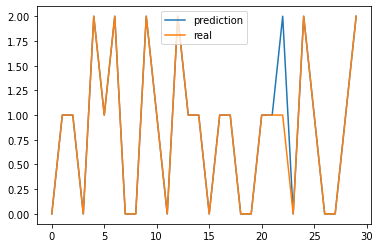

In [15]:
import matplotlib.pyplot as plt
plt.plot(pred, label="prediction")
plt.plot(y_test, label='real')
plt.legend()
plt.show()